In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
from fermipy.gtanalysis import GTAnalysis

Plotter is MatPlotlib


In [3]:
gta = GTAnalysis.create('data/fit2_sed.npy')

2017-06-05 19:49:17 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.14.1 
ScienceTools version 
2017-06-05 19:49:27 INFO    GTAnalysis.setup(): Running setup.
2017-06-05 19:49:27 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2017-06-05 19:49:27 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2017-06-05 19:49:27 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2017-06-05 19:49:27 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2017-06-05 19:49:27 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2017-06-05 19:49:27 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2017-06-05 19:49:27 INFO    GTBinnedAnalysis.setup(): Running setup for component 01
2017-06-05 19:49:27 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2017-06-05 19

In [4]:
gta.print_roi()

2017-06-05 19:51:08 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J1256.1-0547   PointSource    LogParabola       0.000  14212.91      7906.8
3FGL J1249.5-0546   PointSource    PowerLaw          1.651      8.28       144.5
3FGL J1243.9-0217   PointSource    PowerLaw          4.652     15.73        78.1
3FGL J1315.7-0732   PointSource    PowerLaw          5.180     19.74        69.5
3FGL J1256.3-1146   PointSource    PowerLaw          5.990     29.36        80.3
3FGL J1233.7-0145   PointSource    PowerLaw          6.897     28.66       143.2
3FGL J1310.2-1159   PointSource    PowerLaw          7.106      9.15        23.1
3FGL J1311.0+0036   PointSource    PowerLaw          7.409     15.94        18.1
3FGL J1239.1-1158   PointSource    PowerLaw          7.472      7.20       113.3
3FGL J1322.8-0938   PointSource    PowerLaw          7.6

In [5]:
fit = gta.fit()

2017-06-05 19:51:22 INFO    GTAnalysis.fit(): Starting fit.
2017-06-05 19:51:22 INFO    GTAnalysis.fit(): Skipping fit.  No free parameters.


In [6]:
fit

{'config': {'covar': True,
  'init_lambda': 0.0001,
  'max_iter': 100,
  'min_fit_quality': 2,
  'optimizer': 'MINUIT',
  'reoptimize': False,
  'retries': 3,
  'tol': 0.001,
  'verbosity': 0},
 'correlation': None,
 'covariance': None,
 'dloglike': 0.0,
 'edm': 0.0,
 'errors': array([], dtype=float64),
 'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'indices': array([], dtype=int64),
 'is_norm': array([], dtype=bool),
 'loglike': -146707.92529483067,
 'par_names': [],
 'src_names': [],
 'values': array([], dtype=float64)}

In [7]:
c = np.load('data/fit2_sed.npy').flat[0]

In [8]:
E = np.array(c['sources']['3FGL J1256.1-0547']['model_flux']['energies'])
dnde = np.array(c['sources']['3FGL J1256.1-0547']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['3FGL J1256.1-0547']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['3FGL J1256.1-0547']['model_flux']['dnde_lo'])

In [9]:
sed = np.load('data/3fgl_j1256.1-0547_sed.npy').flat[0]

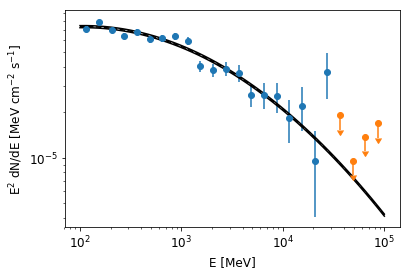

In [10]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-4],
             sed['e2dnde'][:-4], 
             yerr=sed['e2dnde_err'][:-4], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-4:]),
         sed['e2dnde_ul95'][-4:], yerr=0.2*sed['e2dnde_ul95'][-4:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

In [11]:
src_logpar = gta.delete_source('3FGL J1256.1-0547')

2017-06-05 19:52:54 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J1256.1-0547


In [12]:
gta.add_source(src_logpar['name'],{ 'ra' : src_logpar['ra'], 'dec' : src_logpar['dec'],
                 'SpectrumType' : 'PowerLaw', 'Index' : 2.0,
                 'Scale' : 1000, 'Prefactor' : 1e-11,
                 'SpatialModel' : 'PointSource' })

2017-06-05 19:53:24 INFO    GTAnalysis.add_source(): Adding source 3FGL J1256.1-0547


In [13]:
gta.print_roi()

2017-06-05 19:53:41 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J1256.1-0547   PointSource    PowerLaw          0.000       nan      1246.7
3FGL J1249.5-0546   PointSource    PowerLaw          1.651      8.28       144.5
3FGL J1243.9-0217   PointSource    PowerLaw          4.652     15.73        78.1
3FGL J1315.7-0732   PointSource    PowerLaw          5.180     19.74        69.5
3FGL J1256.3-1146   PointSource    PowerLaw          5.990     29.36        80.3
3FGL J1233.7-0145   PointSource    PowerLaw          6.897     28.66       143.2
3FGL J1310.2-1159   PointSource    PowerLaw          7.106      9.15        23.1
3FGL J1311.0+0036   PointSource    PowerLaw          7.409     15.94        18.1
3FGL J1239.1-1158   PointSource    PowerLaw          7.472      7.20       113.3
3FGL J1322.8-0938   PointSource    PowerLaw          7.6

In [14]:
gta.free_source('3FGL J1256.1-0547', pars=['Prefactor','Index'])

2017-06-05 19:53:55 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J1256.1-0547     : ['Index']


In [15]:
fit2 = gta.fit()

2017-06-05 19:54:08 INFO    GTAnalysis.fit(): Starting fit.
2017-06-05 19:54:11 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2017-06-05 19:54:11 INFO    GTAnalysis.fit(): LogLike:  -146726.821 DeltaLogLike:     3252.884 


In [16]:
fit2

{'config': {'covar': True,
  'init_lambda': 0.0001,
  'max_iter': 100,
  'min_fit_quality': 2,
  'optimizer': 'MINUIT',
  'reoptimize': False,
  'retries': 3,
  'tol': 0.001,
  'verbosity': 0},
 'correlation': array([[ 1.        , -0.66853494],
        [-0.66853494,  1.        ]]),
 'covariance': array([[ 0.00966284, -0.0009065 ],
        [-0.0009065 ,  0.00019028]]),
 'dloglike': 3252.8843559062225,
 'edm': 0.000798294289850869,
 'errors': array([ 0.09829972,  0.01379411]),
 'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'indices': array([24, 25]),
 'is_norm': array([ True, False], dtype=bool),
 'loglike': -146726.82139917265,
 'niter': 1,
 'par_names': ['Prefactor', 'Index'],
 'src_names': ['3FGL J1256.1-0547', '3FGL J1256.1-0547'],
 'values': array([ 5.06742676,  2.22231379])}

In [17]:
gta.print_roi()

2017-06-05 19:54:25 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J1256.1-0547   PointSource    PowerLaw          0.000  16216.36      7966.3
3FGL J1249.5-0546   PointSource    PowerLaw          1.651      8.28       144.5
3FGL J1243.9-0217   PointSource    PowerLaw          4.652     15.73        78.1
3FGL J1315.7-0732   PointSource    PowerLaw          5.180     19.74        69.5
3FGL J1256.3-1146   PointSource    PowerLaw          5.990     29.36        80.3
3FGL J1233.7-0145   PointSource    PowerLaw          6.897     28.66       143.2
3FGL J1310.2-1159   PointSource    PowerLaw          7.106      9.15        23.1
3FGL J1311.0+0036   PointSource    PowerLaw          7.409     15.94        18.1
3FGL J1239.1-1158   PointSource    PowerLaw          7.472      7.20       113.3
3FGL J1322.8-0938   PointSource    PowerLaw          7.6

In [18]:
source = gta.roi.get_source_by_name('3FGL J1256.1-0547')

In [19]:
print source

Name           : 3FGL J1256.1-0547
Associations   : ['3FGL J1256.1-0547']
RA/DEC         :    194.041/    -5.791
GLON/GLAT      :    305.094/    57.061
TS             : 16216.36
Npred          : 7966.34
Flux           :  6.92e-07 +/- 1.13e-08
EnergyFlux     : 0.0002984 +/- 6.68e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
Prefactor      :  5.067e-11 +/-   9.83e-13
Index          :     -2.222 +/-    0.01379
Scale          :       1000 +/-        nan


In [20]:
E = np.array(source['model_flux']['energies'])
dnde = np.array(source['model_flux']['dnde'])
dnde_hi = np.array(source['model_flux']['dnde_hi'])
dnde_lo = np.array(source['model_flux']['dnde_lo'])

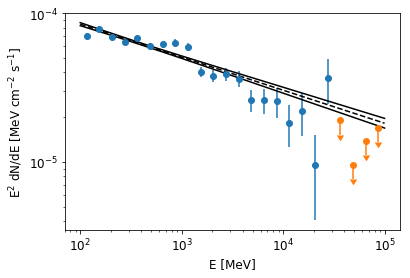

In [21]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-4],
             sed['e2dnde'][:-4], 
             yerr=sed['e2dnde_err'][:-4], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-4:]),
         sed['e2dnde_ul95'][-4:], yerr=0.2*sed['e2dnde_ul95'][-4:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

In [22]:
np.sqrt(-2*(fit2['loglike'] - fit['loglike']))

6.1475367980979225

In [23]:
gta.delete_source('3FGL J1256.1-0547')

2017-06-05 19:57:49 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J1256.1-0547


In [25]:
gta.add_source('3FGL J1256.1-0547',src_logpar)

2017-06-05 19:58:20 INFO    GTAnalysis.add_source(): Adding source 3FGL J1256.1-0547


In [26]:
gta.print_roi()

2017-06-05 19:58:46 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J1256.1-0547   PointSource    LogParabola       0.000       nan      7906.8
3FGL J1249.5-0546   PointSource    PowerLaw          1.651      8.28       144.5
3FGL J1243.9-0217   PointSource    PowerLaw          4.652     15.73        78.1
3FGL J1315.7-0732   PointSource    PowerLaw          5.180     19.74        69.5
3FGL J1256.3-1146   PointSource    PowerLaw          5.990     29.36        80.3
3FGL J1233.7-0145   PointSource    PowerLaw          6.897     28.66       143.2
3FGL J1310.2-1159   PointSource    PowerLaw          7.106      9.15        23.1
3FGL J1311.0+0036   PointSource    PowerLaw          7.409     15.94        18.1
3FGL J1239.1-1158   PointSource    PowerLaw          7.472      7.20       113.3
3FGL J1322.8-0938   PointSource    PowerLaw          7.6

In [27]:
src_logpar['name']

'3FGL J1256.1-0547'